# Importamos librerías y definimos funciones auxiliares

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr

'''
Function to check if the data normally distributed - normality_test
'''
def normality_test(df):
    '''
    La función normality_test es una prueba para verificar si los datos de 
    un marco de datos (dataframe) siguen una distribución normal. La prueba 
    utilizada es la prueba de normalidad de D'Agostino-Pearson, que se realiza 
    con la función normaltest del módulo scipy.stats. Si el valor p (p-value) 
    es menor que 0.05, se rechaza la hipótesis nula de que los datos están 
    distribuidos normalmente. Si el valor p es mayor que 0.05, no podemos 
    rechazar la hipótesis nula y asumimos que los datos se distribuyen normalmente.
    '''
    # Realizamos la prueba de normalidad de D'Agostino-Pearson sobre los datos del dataframe
    stat, p = stats.normaltest(df)

    # Imprimimos los valores de la estadística de la prueba y el valor p
    print('Statistics=%.3f, p=%.3f' % (stat, p))

    # Definimos el nivel de significancia alpha en 0.05
    alpha = 0.05

    # Comparamos el valor p con el nivel de significancia alpha
    if p > alpha:
        
        # Si el valor p es mayor que alpha, no podemos rechazar la hipótesis nula
        print("P-Values es mayor que 0.05")
        print('Fallamos en rechazar la hipótesis nula. Los datos se distribuyen con normalidad')

    else: 
        
        # Si el valor p es menor o igual que alpha, rechazamos la hipótesis nula
        print("P-Values es menor que 0.05")
        print('No podemos aceptar la hipótesis nula y fallamos en rechazar la hipótesis alternativa. Los datos no se distribuyen con normalidad')

'''
Function to check if the data normally distributed - Shapiro-Wilk  normality test
'''
def shapiro_test(df):
    '''
    La función shapiro_test es una prueba de normalidad que utiliza la prueba de 
    Shapiro-Wilk y toma un dataframe como argumento. Imprime los valores de la
     estadística de la prueba y el valor p, y luego determina si los datos se 
     distribuyen con normalidad o no en función del valor de p.
    '''
    # Realizamos la prueba de normalidad de Shapiro-Wilk sobre los datos del dataframe
    stat, p = stats.shapiro(df)

    # Imprimimos los valores de la estadística de la prueba y el valor p
    print('Statistics=%.3f, p=%.3f' % (stat, p))

    # Definimos el nivel de significancia alpha en 0.05
    alpha = 0.05

    # Comparamos el valor p con el nivel de significancia alpha
    if p > alpha:

        # Si el valor p es mayor que alpha, no podemos rechazar la hipótesis nula
        print("P-Values es mayor que 0.05")
        print('Fallamos en rechazar la hipótesis nula. Los datos se distribuyen con normalidad')

    else: 

        # Si el valor p es menor o igual que alpha, rechazamos la hipótesis nula
        print("P-Values es menor que 0.05")
        print('No podemos aceptar la hipótesis nula y fallamos en rechazar la hipótesis alternativa. Los datos no se distribuyen con normalidad')

'''
Function to check if the data normally distributed - Anderson-Darling normality test
'''
def anderson_test(df):
    
    '''
    La función anderson_test es una prueba de normalidad en Python que utiliza la 
    prueba de Anderson-Darling. Toma un dataframe como argumento y realiza la prueba 
    sobre los datos del dataframe. Luego, compara la estadística de la prueba con 
    los valores críticos para diferentes niveles de significancia y determina si los 
    datos se distribuyen normalmente o no. Imprime el resultado de la prueba en la consola.
    '''

    # Realizamos la prueba de normalidad de Anderson-Darling sobre los datos del dataframe
    result = stats.anderson(df)

    # Imprimimos la estadística de la prueba
    print('Statistic: %.3f' % result.statistic)

    # Realizamos un bucle for para comparar la estadística de la prueba con los valores críticos de la prueba para diferentes niveles de significancia
    for i in range(len(result.critical_values)):

        # Obtenemos el nivel de significancia y el valor crítico de la prueba para el nivel de significancia actual del bucle for
        sl, cv = result.significance_level[i], result.critical_values[i]

        # Si la estadística de la prueba es menor que el valor crítico, no podemos rechazar la hipótesis nula
        if result.statistic < result.critical_values[i]: 
            print('%.3f: %.3f, los datos se distribuyen normalmente. Fallamos en rechazar la hipótesis nula.' % (sl, cv))

        # Si la estadística de la prueba es mayor que el valor crítico, rechazamos la hipótesis nula
        else:
            print('%.3f: %.3f, los datos no se distribuyen con normalidad. No podemos aceptar la hipótesis nula y fallamos en rechazar la hipótesis alternativa ' % (sl, cv))

'''
Function to check if the data correlation - Spearman's dependency test
'''
def spearman(data1, data2):
    '''
    La función spearman calcula el coeficiente de correlación de Spearman 
    y su valor p, que evalúa la relación entre dos variables no necesariamente 
    normales. Si el valor p es mayor que el nivel de significancia alfa 
    (generalmente 0.05), se falla en rechazar la hipótesis nula de que las 
    variables son independientes y se considera que los datos se distribuyen 
    normalmente. En caso contrario, se falla en rechazar la hipótesis 
    alternativa de que las variables están correlacionadas y no se distribuyen 
    normalmente. La función imprime el coeficiente de correlación y el 
    resultado de la prueba en la consola.
    '''
    # Se utiliza la función spearmanr de scipy para calcular el coeficiente de correlación de Spearman y su valor p
    stat, p = stats.spearmanr(data1, data2)

    # Se imprime el coeficiente de correlación en la consola
    print('Spearmans correlation coefficient: %.3f' % stat)

    # Se define el nivel de significancia alfa (generalmente 0.05)
    alpha = 0.05

    # Se compara el valor p con alfa para determinar si los datos se distribuyen normalmente o no
    if p > alpha:
        print("El valor P es igual a %.3f. Las dos muestras son independientes. No rechazamos la hipótesis nula" % p)
    else: 
        print('El valor P es igual a %.3f. Existe una dependencia entre las muestras. Rechazamos la hipótesis nula y No rechazamos la hipótesis alternativa'% p)


def pearson_test(data1, data2):
    '''
        H0: las muestras son independientes.
        H1: hay dependencia entre las muestras.
    '''
    stat, p = pearsonr(data1, data2)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Las muestras probablemente son independientes')
    else:
        print('Las muestras probablemente dependen una de la otra')

# Cargamos CSV

In [2]:
df = pd.read_csv('../data/diamonds.csv')

# Información básica del Dataset

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53940 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [5]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,'x','y','z'
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,b'Ideal',b'G',b'SI1',NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


#  Comprobamos valores nulos en el Dataset

In [6]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
'x'        0
'y'        0
'z'        0
dtype: int64

### Observamos que no tenemos valores nulos

# Para el posterior estudio de los datos es necesario conocer los distintos valores que puede haber en cada columna
### Se puede encontrar más info acerca de la valoración de los diamantes en esta web: https://www.diamonds.pro/education/4cs-diamonds/

### El precio de un diamante depende de: Carat, Cut, Color y Clarity. Es decir: quilates, corte, color y claridad

## Columna 'carat'

In [7]:
df['carat'].value_counts()

0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
3.02       1
3.65       1
3.50       1
3.22       1
3.11       1
Name: carat, Length: 273, dtype: int64

### En el caso de la columna 'carat' tenemos muchos posibles valores

### Enfrentemos la variable carat frente a precio

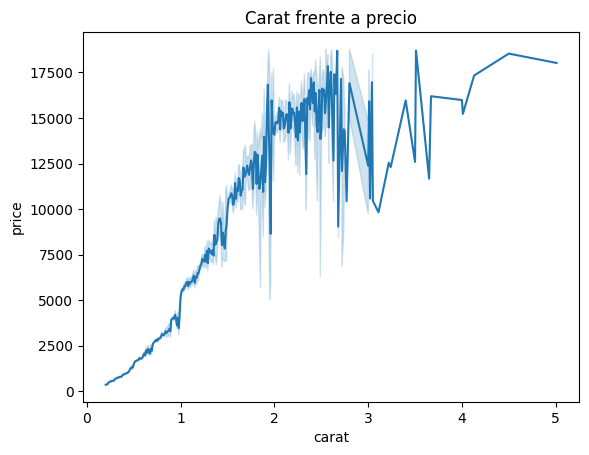

In [8]:
sns.lineplot(x= 'carat', y= 'price', data= df)
plt.title('Carat frente a precio')
plt.show()

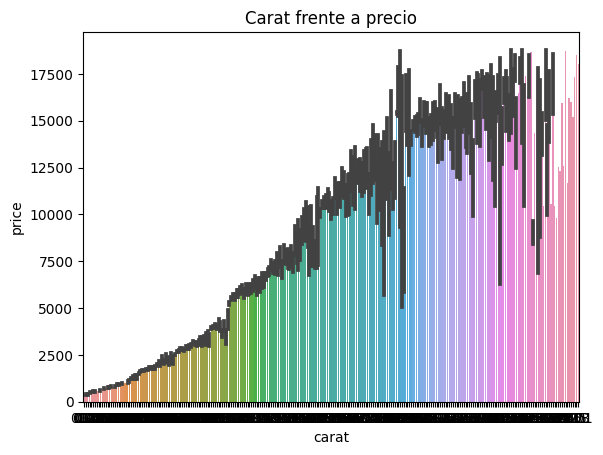

In [9]:
sns.barplot(x= 'carat', y= 'price', data= df)
plt.title('Carat frente a precio')
plt.show()

### Outliers Carat

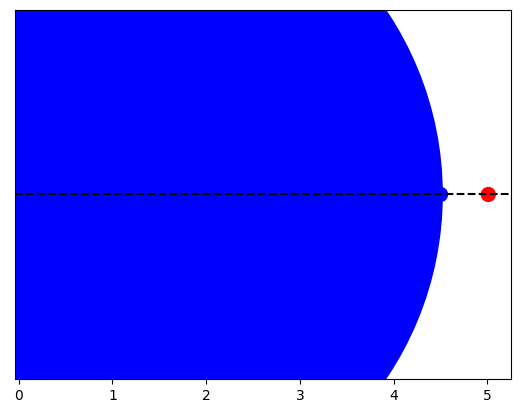

In [10]:
quilates = df['carat']
quilate_unico, counts = np.unique(quilates, return_counts=True)
 
sizes = counts*100
colors = ['blue']*len(quilate_unico)
colors[-1] = 'red'
 
plt.axhline(1, color='k', linestyle='--')
plt.scatter(quilate_unico, np.ones(len(quilate_unico)), s=sizes, color=colors)
plt.yticks([])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f87d8a6f130>,
 'caps': [<matplotlib.lines.Line2D at 0x7f87d87271c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f87d8a68dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f87d812aca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f87d8134d30>],
 'means': []}

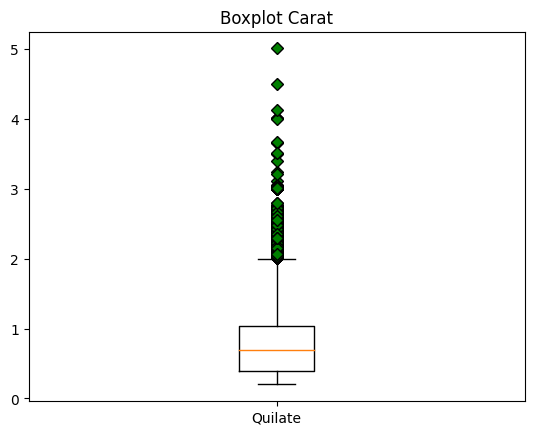

In [11]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot Carat')
ax.boxplot(quilates, flierprops=green_diamond, labels=["Quilate"])

## Columna 'cut'

In [12]:
df['cut'].value_counts()

b'Ideal'        21551
b'Premium'      13791
b'Very Good'    12082
b'Good'          4906
b'Fair'          1610
Name: cut, dtype: int64

In [13]:
df['cut'].sample(10)

4512          b'Fair'
9337       b'Premium'
2075         b'Ideal'
36928        b'Ideal'
20161        b'Ideal'
13820      b'Premium'
15373    b'Very Good'
21578      b'Premium'
45874        b'Ideal'
44189    b'Very Good'
Name: cut, dtype: object

### En el caso de la columna 'cut' tenemos 5 valores no numéricos

### Enfrentemos la variable cut frente a precio

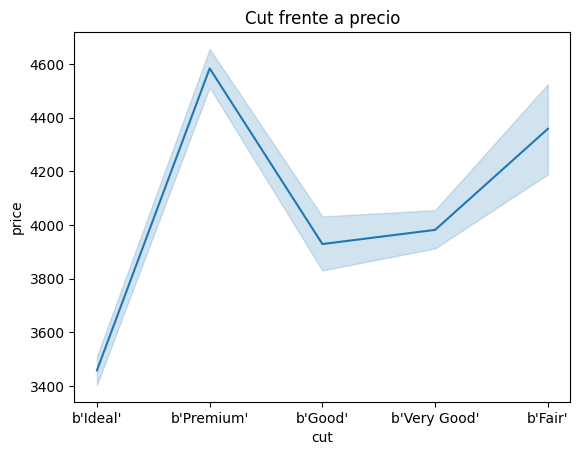

In [14]:
sns.lineplot(x= 'cut', y= 'price', data= df)
plt.title('Cut frente a precio')
plt.show()

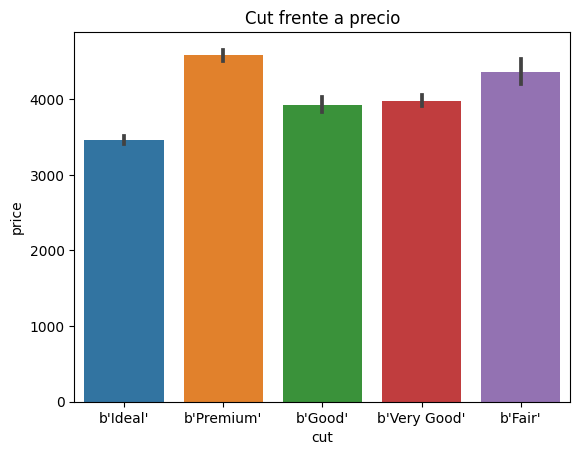

In [15]:
sns.barplot(x= 'cut', y= 'price', data= df)
plt.title('Cut frente a precio')
plt.show()



## Columna 'color'

In [16]:
df['color'].value_counts()

b'G'    11292
b'E'     9797
b'F'     9542
b'H'     8304
b'D'     6775
b'I'     5422
b'J'     2808
Name: color, dtype: int64

### En el caso de la columna 'color' tenemos 7 valores no numéricos

### Enfrentemos la variable color frente a precio

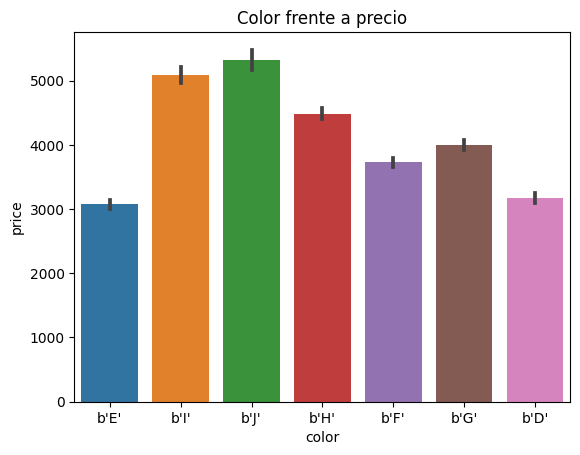

In [17]:
sns.barplot(x= 'color', y= 'price', data= df)
plt.title('Color frente a precio')
plt.show()



## Columna 'clarity'

In [18]:
df['clarity'].value_counts()

b'SI1'     13065
b'VS2'     12258
b'SI2'      9194
b'VS1'      8171
b'VVS2'     5066
b'VVS1'     3655
b'IF'       1790
b'I1'        741
Name: clarity, dtype: int64

### En el caso de la columna 'clarity' tenemos 8 valores no numéricos

### Enfrentemos la variable clarity frente a precio

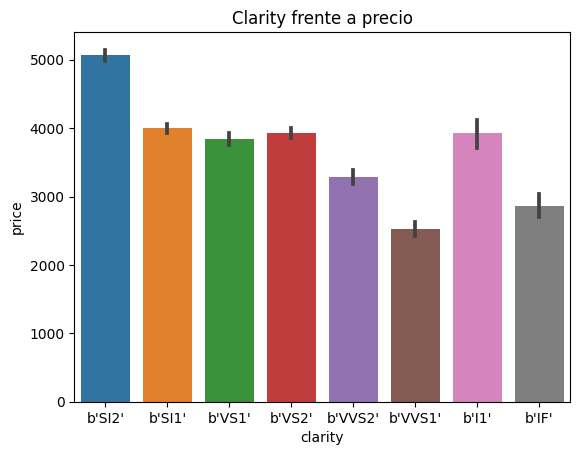

In [19]:
sns.barplot(x= 'clarity', y= 'price', data= df)
plt.title('Clarity frente a precio')
plt.show()

## Pasamos a realizar análisis por variable para evaluar la posible normalización

In [20]:
df.describe(include="all")

,carat,cut,color,clarity,depth,table,price,'x','y','z'
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,b'Ideal',b'G',b'SI1',NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [21]:
df_copia=df.copy()

df_copia.describe(include="all")

,carat,cut,color,clarity,depth,table,price,'x','y','z'
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,b'Ideal',b'G',b'SI1',NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [22]:
# Codificamos los valores no numéricos

from sklearn.preprocessing import LabelEncoder

ml_cut= LabelEncoder()
ml_color= LabelEncoder()
ml_clarity= LabelEncoder()

df_copia['cut_ml']= ml_cut.fit_transform(df_copia['cut'])
df_copia['color_ml']= ml_color.fit_transform(df_copia['color'])
df_copia['clarity_ml']= ml_clarity.fit_transform(df_copia['clarity'])
df_copia.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z',cut_ml,color_ml,clarity_ml
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43,2,1,3
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31,3,1,2
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31,1,1,4
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63,3,5,5
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75,1,6,3


In [23]:
# Desechamos las columnas que no nos interesan

df_copia.drop(["cut", "color", "clarity", "'x'", "'y'", "'z'"], axis= 1, inplace= True)

## Estudiamos posible correlación

<AxesSubplot: >

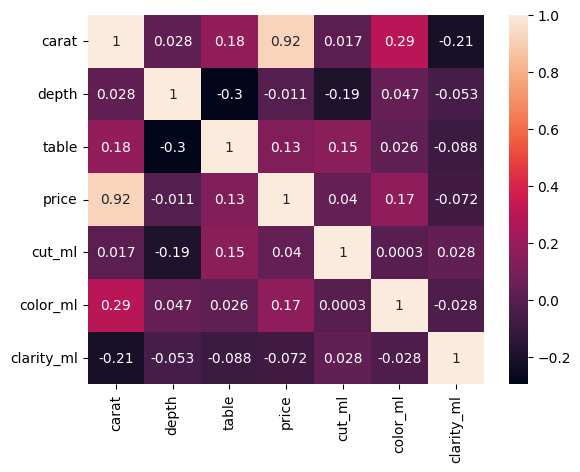

In [24]:
sns.heatmap(df_copia.corr(), annot=True)

## Test de correlación

In [25]:
price_carat = df_copia[['price','carat']]
price_carat.corr()

,price,carat
price,1.000000,0.921591
carat,0.921591,1.000000


In [26]:
pearson_test(df_copia['price'],df_copia['carat'])

stat=0.922, p=0.000
Las muestras probablemente dependen una de la otra


## Test de hipótesis: Normal, Shapiro y Anderson-Darling

Interpretación

- H0: Los datos se distribuyen normalmente.
- H1: Los datos no se distribuyen normalmente.

In [27]:
normality_test(df_copia['carat'])

Statistics=8926.738, p=0.000
P-Values es menor que 0.05
No podemos aceptar la hipótesis nula y fallamos en rechazar la hipótesis alternativa. Los datos no se distribuyen con normalidad


In [28]:
shapiro_test(df_copia['carat'])

Statistics=0.894, p=0.000
P-Values es menor que 0.05
No podemos aceptar la hipótesis nula y fallamos en rechazar la hipótesis alternativa. Los datos no se distribuyen con normalidad


/opt/miniconda3/envs/ramup_py39/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [29]:
anderson_test(df_copia['carat'])

Statistic: 1529.052
15.000: 0.576, los datos no se distribuyen con normalidad. No podemos aceptar la hipótesis nula y fallamos en rechazar la hipótesis alternativa 
10.000: 0.656, los datos no se distribuyen con normalidad. No podemos aceptar la hipótesis nula y fallamos en rechazar la hipótesis alternativa 
5.000: 0.787, los datos no se distribuyen con normalidad. No podemos aceptar la hipótesis nula y fallamos en rechazar la hipótesis alternativa 
2.500: 0.918, los datos no se distribuyen con normalidad. No podemos aceptar la hipótesis nula y fallamos en rechazar la hipótesis alternativa 
1.000: 1.092, los datos no se distribuyen con normalidad. No podemos aceptar la hipótesis nula y fallamos en rechazar la hipótesis alternativa 


## Los 3 test anteriores nos indican que la variable carat, la que más correlación tiene no tiene una distribución con normalidad

## Veámoslo en una gráfica

/var/folders/ky/1wd728kj3z34yrqzyh1m58p00000gn/T/ipykernel_3522/1737144984.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=df_copia, x='price', kde=True, palette=['b','r','g'])


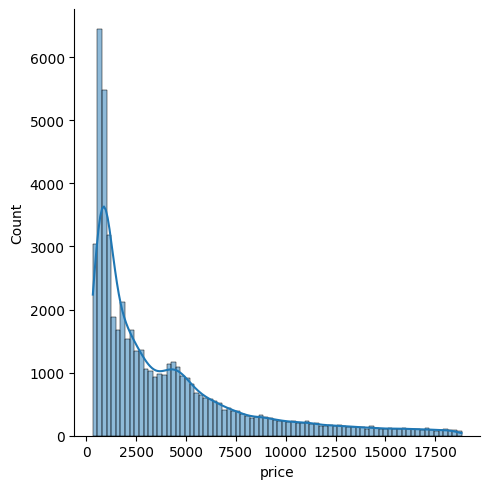

In [30]:
sns.displot(data=df_copia, x='price', kde=True, palette=['b','r','g'])

# Como comprobamos que no hay distribución normal en nuestras variables no podemos usar T-student

# Realizaremos hipótesis con Mann-Whitney

Siendo $\mu_1$ la media del precio para los diamantes de color E y $\mu_2$ la media del precio para los diamantes de color D
$$
\left\{
\begin{array}{ll}
H_0: & \mu_1 = \mu_2 \\
H_1: & \mu_1 \neq \mu_2
\end{array}
\right.
$$

In [31]:
## Dividimos en dos dataframes en funcion del color

# Hipótesis nula es que son iguales
# Hipótesis alternativa es que son diferentes

color1 = df[df["color"]=="b'E'"]
color2 = df[df["color"]=="b'D'"]

estadistico, p_valor = stats.mannwhitneyu(color1["price"], color2["price"], alternative = "two-sided")

print(p_valor)

0.007048596255054776


Se comprueba la hipótesis alternativa ya que el valor es cercano a 0

$$
\left\{
\begin{array}{ll}
H_0: & \mu_1 \leq \mu_2 \\
H_1: & \mu_1 > \mu_2
\end{array}
\right.
$$

In [32]:
## Dividimos en dos dataframes en funcion del color

# Hipótesis nula es que color E menor o igual que color D
# Hippótesis alternativa color E es mayor que color D

color1 = df[df["color"]=="b'E'"]
color2 = df[df["color"]=="b'D'"]

estadistico, p_valor = stats.mannwhitneyu(color1["price"], color2["price"], alternative = "greater")

print(p_valor)

0.9964757368018083


Se comprueba la hipótesis nula ya que el valor es cercano a 1

# Conclusiones

## --> El valor con mas correlación al precio es 'Carat', es decir, los quilates que tenga el diamante
## --> Hemos comprobado que el precio depende de otras características pero no con correlación
## --> La distribución del precio no es gaussiana, está más a la izquierda del centro